# Evaluate and Compare Optimizers

Test classes and functions from `optprob` module for comparing different optimization algorithms.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import skopt

from problems.optprob.problems import (
    solve_problem_with_optimizer, 
    solve_problem_with_optimizer_n_repeats
)
from problems.optprob.plot_utils import (function_evaluations_plot, best_guesses_plot, best_guesses_plot_n_repeats)
from problems.toy_1d.toy_1d_problem import Toy1DProblem

from platform import python_version
python_version()

0.17499977934365754 2.5085382557867626


'3.12.11'

In [2]:

import lpfgopt
lpfgopt.__version__

'1.0.1'

## Optimization Problem Definition

### Example 1. Toy 1D Problem

In [3]:
# Test problem instance
problem = Toy1DProblem()
problem

Toy1DProblem(_name='Toy1DProblem', _guesses=[], _input_dim=1, _bounds=[(-5.0, 5.0)], _global_minimum=[2.5085382557867626])

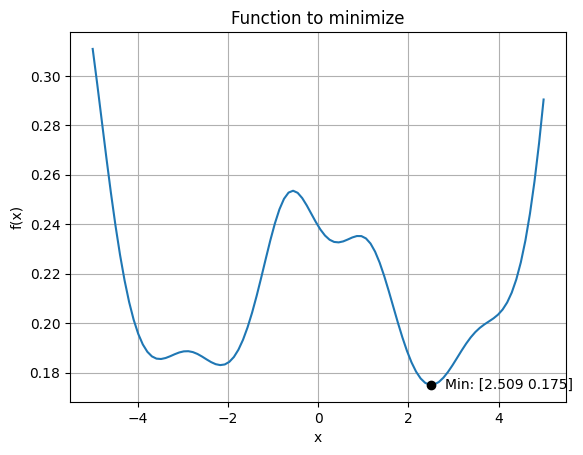

In [4]:
X = np.linspace(-5, 5, 100).reshape(1, -1)
Y = problem(X)

min_pt = np.array([problem.global_minimum[0], problem(problem.global_minimum)])

plt.plot(X.T, Y.T)
plt.plot(*min_pt, 'ko')
plt.annotate(f'Min: {min_pt.round(3)}', min_pt, xytext=(10, 0),
             textcoords='offset points', va='center')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function to minimize')
plt.grid()

In [5]:
rng = np.random.default_rng(0)
x0 = rng.uniform(*zip(*problem.bounds))
sol = solve_problem_with_optimizer(problem, scipy.optimize.minimize, x0, bounds=problem.bounds)
sol

  message: CONVERGENCE: NORM OF PROJECTED GRADIENT <= PGTOL
  success: True
   status: 0
      fun: 0.17499977934672517
        x: [ 2.509e+00]
      nit: 5
      jac: [ 7.411e-07]
     nfev: 16
     njev: 8
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>

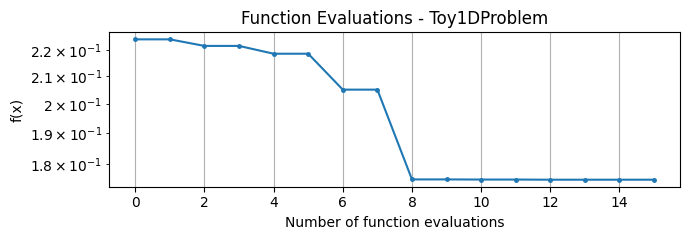

In [6]:
function_evaluations_plot(problem, markersize=5, linestyle='-')
plt.tight_layout()
plt.show()

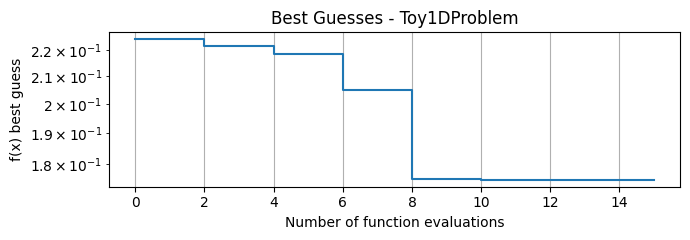

In [7]:
best_guesses_plot(problem)
plt.tight_layout()
plt.show()

In [8]:
solve_problem_with_optimizer(problem, lpfgopt.minimize, problem.bounds)

        best: [np.float64(0.17499977934365832), 2.5085383607767113]
 final_error: np.float64(9.554226865545993e-06)
         fun: np.float64(0.17499977934365832)
       maxcv: 0
     message: 'Tolerance condition satisfied'
        nfev: 276
         nit: 256
    pointset: [[np.float64(0.17499977934371677), 2.5085370754352505], [np.float64(0.1749997793436619), 2.5085385417536292], [np.float64(0.1749997793437195), 2.508539407405754], [np.float64(0.17499977934372224), 2.508537023283531], [np.float64(0.1749997793438566), 2.5085403416400207], [np.float64(0.1749997793437233), 2.508537013324442], [np.float64(0.1749997793436594), 2.508538433623255], [np.float64(0.17499977934365832), 2.5085383607767113], [np.float64(0.17499977934374814), 2.5085368023836354], [np.float64(0.1749997793438278), 2.508536273665887], [np.float64(0.17499977934365923), 2.508538032784126], [np.float64(0.1749997793437687), 2.5085398075999463], [np.float64(0.17499977934373245), 2.508536931492471], [np.float64(0.1749997793

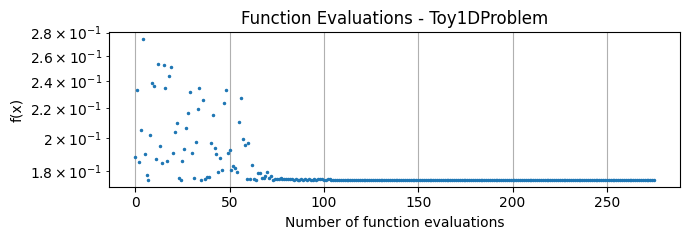

In [9]:
function_evaluations_plot(problem)
plt.tight_layout()
plt.show()

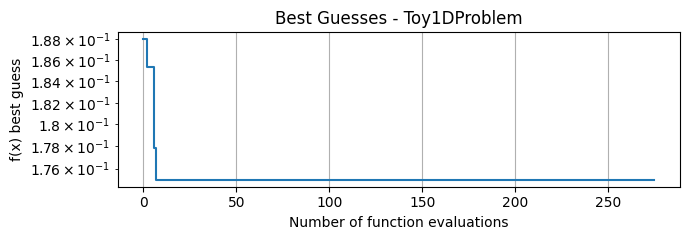

In [10]:
best_guesses_plot(problem)
plt.tight_layout()
plt.show()

In [11]:
fun_evals, unique_solutions, best_guesses = solve_problem_with_optimizer_n_repeats(problem, lpfgopt.minimize, 20, problem.bounds, tol=1e-6)
unique_solutions

100%|██████████| 20/20 [00:00<00:00, 75.63it/s]


Counter({(2.508538,): 15, (-2.158829,): 4, (-3.51245,): 1})

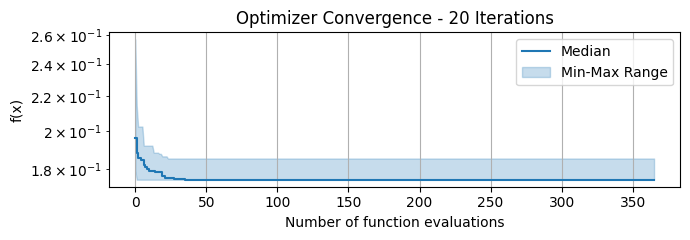

In [12]:
ax = best_guesses_plot_n_repeats(fun_evals)
plt.tight_layout()
plt.show()

In [13]:
min(best_guesses)

(np.float64(0.1749997793436575), [2.5085382115744177])

## Bayesian Optimization

In [14]:
# Run Bayesian optimization
problem.reset()
res = skopt.gp_minimize(
    problem,            # the function to minimize
    problem.bounds,     # the bounds on each dimension of x
    n_calls=50,
    noise=1e-10,
    random_state=0,
    n_initial_points=10,
)
res

          fun: 0.17500111933632143
            x: [2.5030592025698226]
    func_vals: [ 2.353e-01  1.955e-01 ...  1.753e-01  1.750e-01]
      x_iters: [[0.9284461822501839], [3.442657485810175], [3.57945617622757], [3.472517387841256], [1.2356369678597243], [-1.1561829270730009], [-2.0246539345552765], [-4.432870226825568], [-2.2734370541988675], [-0.22334882678650025], [5.0], [2.5030592025698226], [-3.222131866188498], [2.7433392642763144], [-2.806903463880937], [2.317653236172527], [2.5575948583950394], [-5.0], [2.5157138442907048], [-3.7564665277672393], [4.293614225807886], [1.893582495947892], [-1.6514441938266304], [0.31676959428314255], [-3.5034307569808063], [3.0264185419955076], [-4.057510381329239], [3.9966962794402505], [2.469344860333665], [2.5321444828590476], [2.4963010828734404], [2.390470747159286], [2.430939008130789], [2.5429797153575997], [2.55128225576032], [2.3906886327921804], [2.567817095415088], [2.421033644908843], [2.47625494070515], [2.519037255816757], [2.24

In [15]:
res['x'], res['fun']

([2.5030592025698226], np.float64(0.17500111933632143))

In [16]:
problem.best_guess

(np.float64(0.17500111933632143), [2.5030592025698226])

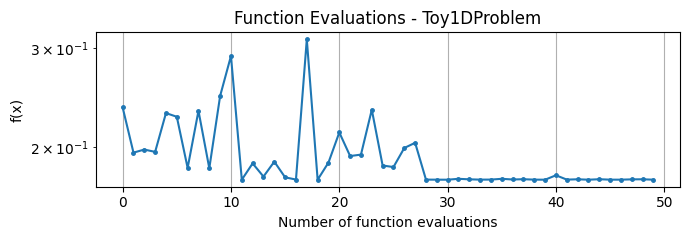

In [17]:
function_evaluations_plot(problem, markersize=5, linestyle='-')
plt.tight_layout()
plt.show()

In [18]:
fun_evals, unique_solutions, best_guesses = solve_problem_with_optimizer_n_repeats(
    problem, skopt.gp_minimize, 10, problem.bounds, noise=1e-10, n_calls=50
)
unique_solutions

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [03:53<00:00, 23.38s/it]


Counter({(2.508522,): 1,
         (2.509085,): 1,
         (2.509388,): 1,
         (2.507917,): 1,
         (2.512058,): 1,
         (2.510626,): 1,
         (2.507712,): 1,
         (2.507328,): 1,
         (2.504429,): 1,
         (2.508538,): 1})

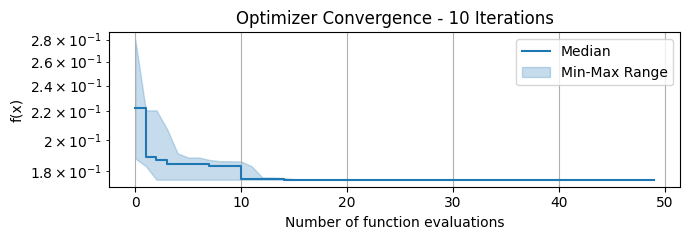

In [19]:
ax = best_guesses_plot_n_repeats(fun_evals)
plt.tight_layout()
plt.show()

In [20]:
min(best_guesses)

(np.float64(0.17499977934366653), [2.5085377790502985])